6. Perform Sentiment Analysis in the network graph using RNN.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data
texts = ["I love this product", "This is terrible", "Absolutely great experience"]
labels = [1, 0, 1]  # Binary sentiment

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)

# Convert labels to NumPy array
labels = np.array(labels)

# Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),  # removed input_length warning
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, labels, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6908
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6667 - loss: 0.6831
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6667 - loss: 0.6753
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6667 - loss: 0.6673
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6667 - loss: 0.6587


In [ ]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=100)
    prediction = model.predict(padded)[0][0]
    return 'positive' if prediction > 0.5 else 'negative'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


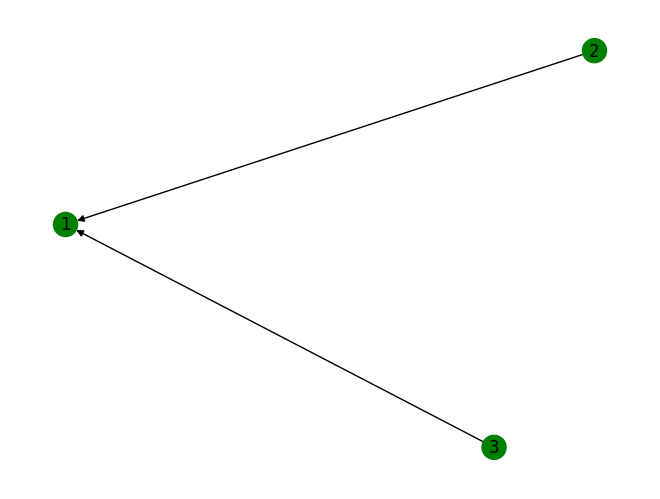

In [ ]:
import networkx as nx

G = nx.DiGraph()

# Add nodes with sentiment
nodes = {
    1: "I love this!",
    2: "This is bad",
    3: "Agreed!"
}
for node_id, text in nodes.items():
    sentiment = predict_sentiment(text)
    G.add_node(node_id, sentiment=sentiment)

# Add edges (e.g., reply or retweet)
G.add_edge(2, 1)  # user 2 replied to user 1
G.add_edge(3, 1)

# Visualize
import matplotlib.pyplot as plt

color_map = []
for node in G:
    color_map.append('green' if G.nodes[node]['sentiment'] == 'positive' else 'red')

nx.draw(G, with_labels=True, node_color=color_map)
plt.show()